# Span Batch Format Analysis

In [1]:
import json
import statistics
import matplotlib.pyplot as plt

DATA_ROOT_DIR = "./artifacts"

In [2]:
#### FIX ME ####
TARGET_PERMS = ["0123465", "0134625", "3041265", "0125634", "0324165", "3041256", "3401256", "6051234", "0132456", "0352614"]
################

In [3]:

def analyze(l1_chain_name, l2_chain_name, perm, plot=True, stdout=True):
    CHAIN_NAME = f"{l1_chain_name}/{l2_chain_name}"
    DATA_DIR = f"{DATA_ROOT_DIR}/{CHAIN_NAME}"
    FORMAT_DIR = f"{DATA_DIR}/format_result"
    filename = f"{FORMAT_DIR}/{perm}.json"

    with open(filename) as f:
        result = json.load(f)
        total_cnt = result["TotalSpanBatchCount"]
        reduced_cnt = result["ReducedSpanBatchCount"]
        size_deltas = result["SizeDeltas"]
        size_delta_sum = result["SizeDeltaSum"]
        original_compressed_sizes = result["OriginalCompressedSizes"]
        original_compressed_size_sum = result["OriginalCompressedSizeSum"]
        assert sum(size_deltas) == size_delta_sum
        assert sum(original_compressed_sizes) == original_compressed_size_sum


    Xs = list(range(total_cnt))
    reduction_percentages = [delta / size * 100 for delta, size in zip(size_deltas, original_compressed_sizes)]
    Ys = reduction_percentages[:]

    reduction_percentage_stdev = statistics.stdev(reduction_percentages)
    final_reduction_percentage = size_delta_sum / original_compressed_size_sum * 100
    channel_benefit_percentage = reduced_cnt / total_cnt * 100

    if plot:
        plt.scatter(Xs, Ys, s=5)
        plt.xlabel("index ")
        plt.ylabel("reduction [%]")
        plt.title(CHAIN_NAME)

    if stdout:
        print(f"{perm = }")
        print(f"{original_compressed_size_sum = }")
        print(f"{size_delta_sum = }")
        print(f"{reduction_percentage_stdev = } %")
        print(f"{final_reduction_percentage = } %")
        print(f"{channel_benefit_percentage = } %")

    return final_reduction_percentage, channel_benefit_percentage, reduction_percentage_stdev


def summary(l1_chain_name, l2_chain_name):
    results = []
    for perm in TARGET_PERMS:
        result = analyze(l1_chain_name, l2_chain_name, perm, plot=True, stdout=False)
        results.append((result, perm))
    results.sort(reverse=True)

    for result in results:
        (final_reduction_percentage, channel_benefit_percentage, reduction_percentage_stdev), perm = result
        print(f"{perm = }, {final_reduction_percentage = } %, {channel_benefit_percentage = } %, {reduction_percentage_stdev = } %")


perm = '6051234', final_reduction_percentage = 0.05259279143980582 %, channel_benefit_percentage = 87.00980392156863 %, reduction_percentage_stdev = 0.04633687597990863 %
perm = '3041265', final_reduction_percentage = 0.045889770257973424 %, channel_benefit_percentage = 86.27450980392157 %, reduction_percentage_stdev = 0.036185858713764375 %
perm = '0125634', final_reduction_percentage = 0.04546907659402011 %, channel_benefit_percentage = 89.95098039215686 %, reduction_percentage_stdev = 0.03860636367907172 %
perm = '3401256', final_reduction_percentage = 0.04101552642734189 %, channel_benefit_percentage = 99.26470588235294 %, reduction_percentage_stdev = 0.026321918144041334 %
perm = '3041256', final_reduction_percentage = 0.040987448985921195 %, channel_benefit_percentage = 99.26470588235294 %, reduction_percentage_stdev = 0.026334903070366816 %
perm = '0134625', final_reduction_percentage = 0.02122935345818264 %, channel_benefit_percentage = 64.4607843137255 %, reduction_percentage_

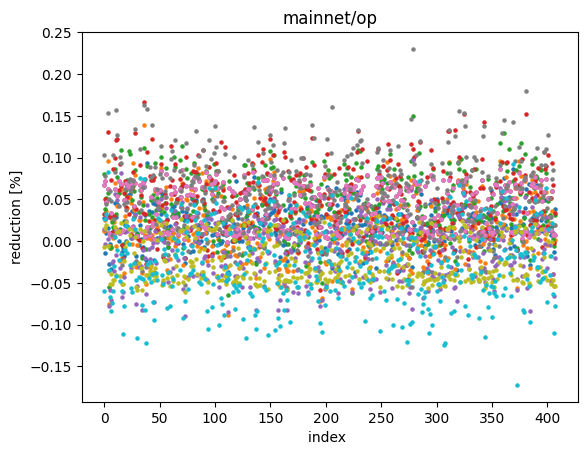

In [ ]:
summary(l1_chain_name="mainnet", l2_chain_name="op")

perm = '0125634', final_reduction_percentage = 0.00743586246308893 %, channel_benefit_percentage = 55.03875968992248 %, reduction_percentage_stdev = 0.07791527803367405 %
perm = '0132456', final_reduction_percentage = -0.019666226634027666 %, channel_benefit_percentage = 47.83695923980995 %, reduction_percentage_stdev = 0.0207525773034381 %
perm = '6051234', final_reduction_percentage = -0.041376955497829125 %, channel_benefit_percentage = 42.385596399099775 %, reduction_percentage_stdev = 0.25124634746075847 %
perm = '3401256', final_reduction_percentage = -0.05445941374788613 %, channel_benefit_percentage = 43.135783945986496 %, reduction_percentage_stdev = 0.05117195468261092 %
perm = '3041256', final_reduction_percentage = -0.05473951840676679 %, channel_benefit_percentage = 38.65966491622906 %, reduction_percentage_stdev = 0.05105598624878383 %
perm = '0123465', final_reduction_percentage = -0.055276821969713105 %, channel_benefit_percentage = 38.48462115528882 %, reduction_percen

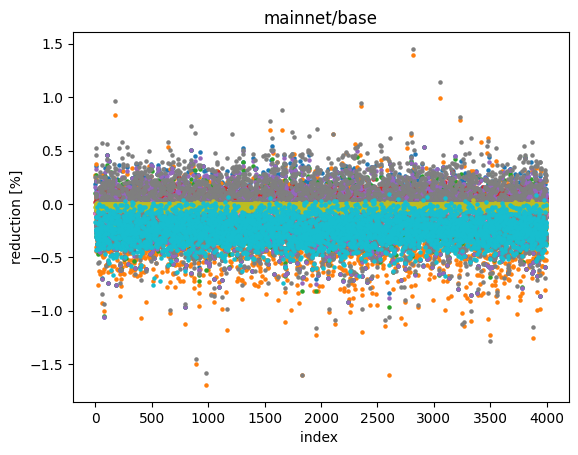

In [ ]:
summary(l1_chain_name="mainnet", l2_chain_name="base")

perm = '6051234', final_reduction_percentage = 0.0020770361451355095 %, channel_benefit_percentage = 50.245098039215684 %, reduction_percentage_stdev = 0.40396155895854574 %
perm = '3041256', final_reduction_percentage = -0.004077334501657639 %, channel_benefit_percentage = 41.911764705882355 %, reduction_percentage_stdev = 0.04817424466826722 %
perm = '3401256', final_reduction_percentage = -0.004092682059380315 %, channel_benefit_percentage = 42.15686274509804 %, reduction_percentage_stdev = 0.04792454473202586 %
perm = '0132456', final_reduction_percentage = -0.015495917447328717 %, channel_benefit_percentage = 27.450980392156865 %, reduction_percentage_stdev = 0.022764907043831998 %
perm = '0125634', final_reduction_percentage = -0.03749919936907213 %, channel_benefit_percentage = 48.77450980392157 %, reduction_percentage_stdev = 0.15159296670529 %
perm = '0123465', final_reduction_percentage = -0.09005946871666383 %, channel_benefit_percentage = 40.44117647058824 %, reduction_perc

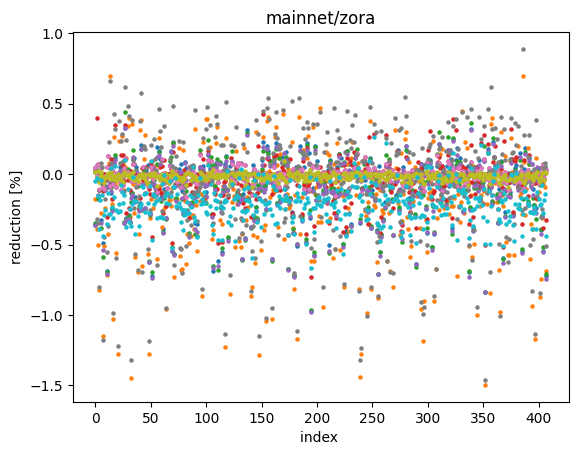

In [ ]:
summary(l1_chain_name="mainnet", l2_chain_name="zora")

perm = '0324165', final_reduction_percentage = 0.0428193405245837 %, channel_benefit_percentage = 93.38235294117648 %, reduction_percentage_stdev = 0.1037877750712613 %
perm = '0352614', final_reduction_percentage = 0.04044448634422864 %, channel_benefit_percentage = 93.38235294117648 %, reduction_percentage_stdev = 0.11326674326656795 %
perm = '0134625', final_reduction_percentage = 0.03267223629943025 %, channel_benefit_percentage = 95.83333333333334 %, reduction_percentage_stdev = 0.09556606810560728 %
perm = '3041265', final_reduction_percentage = 0.02633929181848342 %, channel_benefit_percentage = 78.67647058823529 %, reduction_percentage_stdev = 0.1456389802864149 %
perm = '3041256', final_reduction_percentage = 0.02115779178861783 %, channel_benefit_percentage = 75.49019607843137 %, reduction_percentage_stdev = 0.1468039705675193 %
perm = '0132456', final_reduction_percentage = 0.020869930675847515 %, channel_benefit_percentage = 94.85294117647058 %, reduction_percentage_stdev =

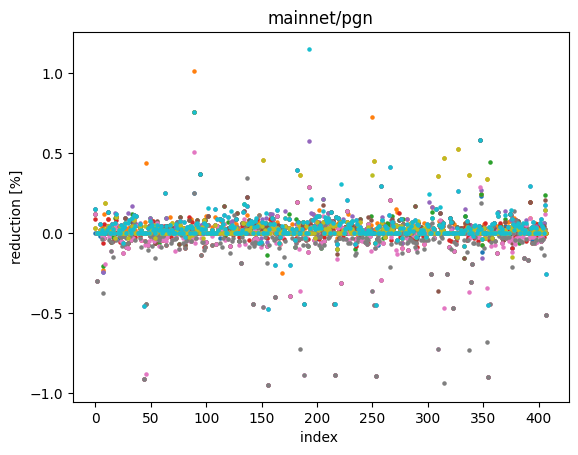

In [ ]:
summary(l1_chain_name="mainnet", l2_chain_name="pgn")

perm = '6051234', final_reduction_percentage = 0.011471977669459064 %, channel_benefit_percentage = 64.85931402752105 %, reduction_percentage_stdev = 0.10495022814803658 %
perm = '0125634', final_reduction_percentage = 0.005167059555059565 %, channel_benefit_percentage = 90.40870815362497 %, reduction_percentage_stdev = 0.01512389142434611 %
perm = '0123465', final_reduction_percentage = 0.0016219725862617817 %, channel_benefit_percentage = 80.50934483466831 %, reduction_percentage_stdev = 0.042644177612583656 %
perm = '0324165', final_reduction_percentage = 0.0012779466734295236 %, channel_benefit_percentage = 78.37338262476895 %, reduction_percentage_stdev = 0.045831667090074996 %
perm = '0134625', final_reduction_percentage = -0.00030876563921787147 %, channel_benefit_percentage = 77.36701581433559 %, reduction_percentage_stdev = 0.08944167361046912 %
perm = '0132456', final_reduction_percentage = -0.0006089544551241354 %, channel_benefit_percentage = 95.25569932224276 %, reduction_

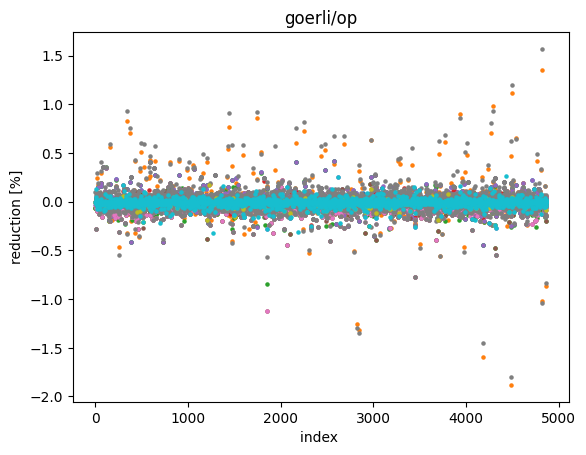

In [ ]:
summary(l1_chain_name="goerli", l2_chain_name="op")